In [107]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['figure.figsize'] = [15, 7]
# plt.rcParams['figure.figsize'] = [12, 12]
import os
from glob import glob

In [21]:
# 54 measures


['35', '663986']

In [28]:
measures = sorted(glob('cancellation_accs/*.npy'), key=lambda f: int(os.path.splitext(os.path.basename(f))[0].split('-')[0]))

In [43]:
n = 43520

In [67]:
measures_n = len(measures)

mm = np.zeros(measures_n)
rates = np.zeros(measures_n)
mean_1 = np.zeros((measures_n, n))
fft_1 = np.zeros((measures_n, n // 2 + 1))

In [71]:
for i, measure in enumerate(measures):
    mm[i]     = int(os.path.splitext(os.path.basename(measure))[0].split('-')[0])
    rates[i]  = int(os.path.splitext(os.path.basename(measure))[0].split('-')[1])
    mean_1[i] = np.load(measure)[0]
    fft_1[i]  = 20 * np.log10(np.abs(
        np.fft.rfft(mean_1[i])
    ) / n)
print(mm)
print(rates)
rate_mean = rates.mean()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100. 120. 140. 160. 180. 200. 250. 300. 350. 400.]
[662154. 662460. 664139. 664468. 663973. 664606. 663912. 664347. 664390.
 663016. 664134. 663915. 663866. 664291. 664301. 664062. 664025. 663923.
 663954. 664462. 663997. 664356. 664155. 664080. 663892. 663993. 664000.
 664637. 663919. 663959. 663994. 663986. 664104. 663946. 664072. 664068.
 664058. 663962. 664241. 663872. 662711. 663925. 663942. 664064. 664059.
 663956. 664090. 664213. 664048. 663833. 664711. 662667. 664022. 663827.]


In [72]:
# rate_mean
f = np.fft.rfftfreq(n, d = 1. / rate_mean)

In [84]:
# MM, F = np.meshgrid(mm, f)
F, MM = np.meshgrid(f, mm)

In [85]:
print(
    MM.shape,
    F.shape,
    fft_1.shape
)

(54, 21761) (54, 21761) (54, 21761)


In [113]:
mm[-1]

400.0

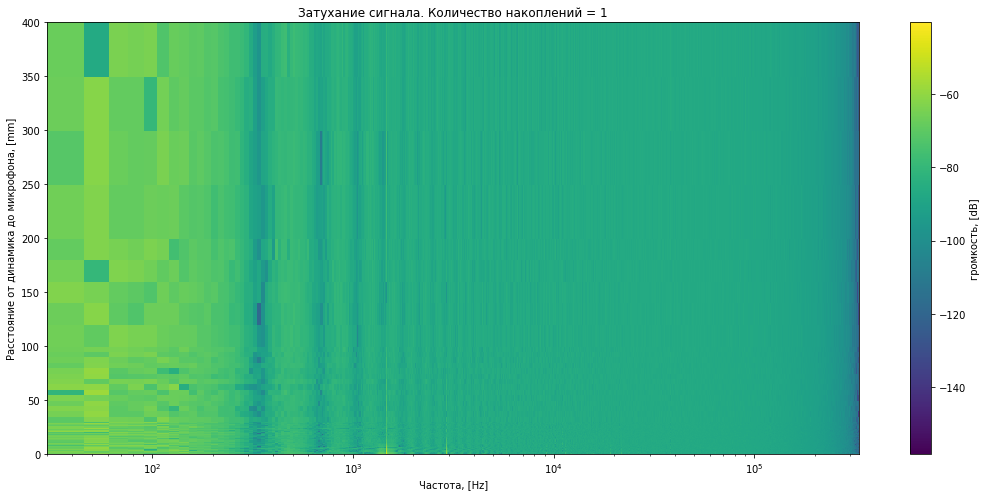

In [118]:
plt.title(f'Затухание сигнала. Количество накоплений = {1}')
plt.xlabel('Частота, [Hz]')
plt.ylabel('Расстояние от динамика до микрофона, [mm]')
plt.xlim(30, rate_mean/2) 
plt.semilogx()
# plt.semilogy()
plt.pcolormesh(F, MM, fft_1)
plt.tight_layout()
plt.colorbar(label='громкость, [dB]')
plt.savefig('cancellation.png')

<Figure size 2160x2160 with 0 Axes>

In [66]:
xz = np.arange(11)
print(len(np.fft.rfft(xz)), len(xz)//2 + 1)

6 6
